<img src=images/gdd-logo.png width=300px align=right>

# Classification

In this notebook, we shall classify penguins species based on bodily measurements using the scikit-learn API. 

We shall first introduce the dataset and the Scikit-Learn library. Afterwards we will cover the following aspects:

- [Loading in the data](#loading-in-the-data)    
    - [<mark>Exploring the dataset</mark>](#exploring-the-dataset) 
    - [Visualizing the dataset](#visualising-the-dataset)  
- [Preparing the data for sklearn](#preparing)
    - [Splitting the dataset](#train-test-split)
- [Model creation & evaluation](#model)
    - [Training and evaluating a Scikit-Learn model](#steps)
    - [Visualzing the model](#vis)
    - [<mark>Choosing a different model</mark>](#choosing-models)  

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/logo.png)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## About the data
The data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antartica LTER. Their goal was to provide a great dataset for data exploration, visualisation and - in this case - a demonstration of the scikit-learn API. 

The data set contains measurements for different species of penguins living at the Palmer station:

|Field|Description|
|:---|:---|
|species|The species of the penguin: Adelie, Chinstrap or Gentoo|
|island|The island on which the penguin was spotted|
|bill_length_mm|The length of the penguin's bill in mm|
|bill_depth_mm|The depth of the penguin's bill in mm|
|flipper_length_mm|The length of the penguin's flipper in mm|
|body_mass_g|The weight of the penguin in grams|
|sex|The gender of the penguin - Female or Male|

<img src="images/02_Classification_Penguins/culmen_depth.png" width="600">

## Scikit-Learn
Scikit-learn is *the* library for machine learning in Python. You could consider it the swiss army knife of machine learning. A wide variety of machine learning models are implemented by the community and core developers, with a consistent API. Once you master this API, it's easy to apply a wide variety of machine learning algorithms, and you have a handy tool to help you out with preprocessing, model evaluation and model selection. 

#### Why scikit-learn?
- Many available machine learning models
- Models are implemented by an expert team and checked by a large community
- Covers most machine-learning tasks
- Commitment to documentation, consistency and usability
- Designed to work with other key Python libraries (NumPy, Pandas etc)

<a id = 'loading-in-the-data'></a>
## 1. Loading in the data

There are many places your data can originate from. Maybe you want to load it from a Excel file you have stored locally on your system, maybe you have a .csv file stored online somewhere. Scikit-learn comes with various standard datasets that can be used for practice, that can be loaded if you have scikit-learn installed on your system. 

Our dataset will be loaded in as a Pandas dataframe and can be used as such. Pandas is a powerful library for data wrangling.

In [2]:
penguins = pd.read_csv('data/penguins.csv')
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<a id = 'exploring-the-dataset'></a>
## <mark> Exercise: Exploring the dataset </mark>

Below are some typical things you may want to check as part of your initial investigation of the dataset.

1. How many rows and columns are present in the data?

In [3]:
penguins.shape

(344, 7)

2. Which data types are used by each column?

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

3. Are there any missing values?

In [8]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [7]:
len(penguins) - penguins.count()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

4. How many species are there?

In [13]:
len(penguins['species'].unique())

3

In [16]:
(
    penguins
    .groupby('species')
    #.ngroups
    .count()
)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [17]:
penguins['species'].nunique()

3

5. How many penguins are there for each species?

In [21]:
(
    penguins
    .groupby('species')
    .agg({'species':'count'})
)

,species
species,
Adelie,152
Chinstrap,68
Gentoo,124


In [19]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<a id = 'visualising-the-dataset'></a>
## Visualising the dataset 

To understand the dataset better it can be useful to create some visualisations.

Below is a  histogram of the penguin's flipper lengths:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

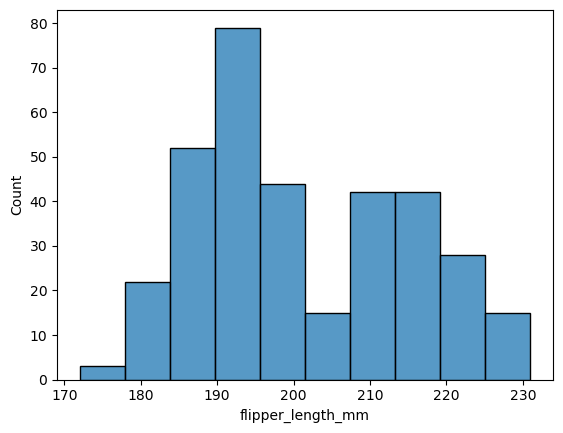

In [22]:
sns.histplot(data=penguins, x='flipper_length_mm')

We can use visualisations to examine how different the data is for the different species.

For example, here is a histogram of flipper lengths *for the different species*. Would you be able to separate the species based on this measurement alone?

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

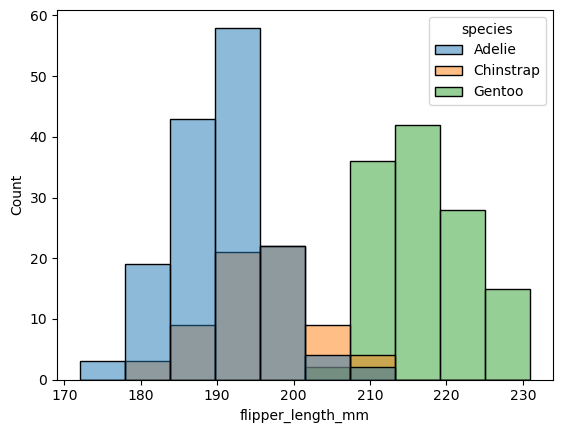

In [23]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species')

Let's examine the relationship between two variables.

Below is a scatter plot of flipper length vs. body mass:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

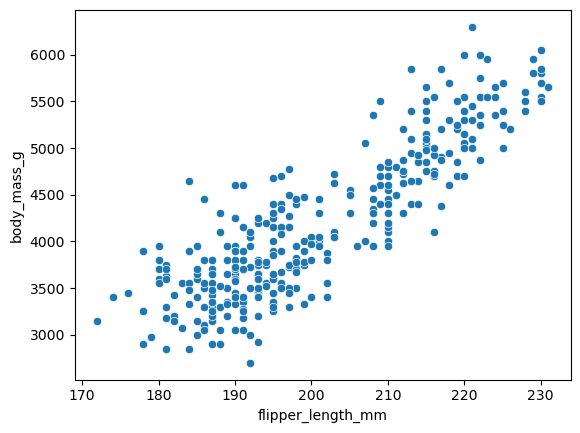

In [24]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g')

It may be easier to distinguish different species when we look at more than one variable.

Here is a a scatter plot of flipper length vs. body mass *for the different species*. Would you be able to separate the species based on the relationship between these measurements?

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

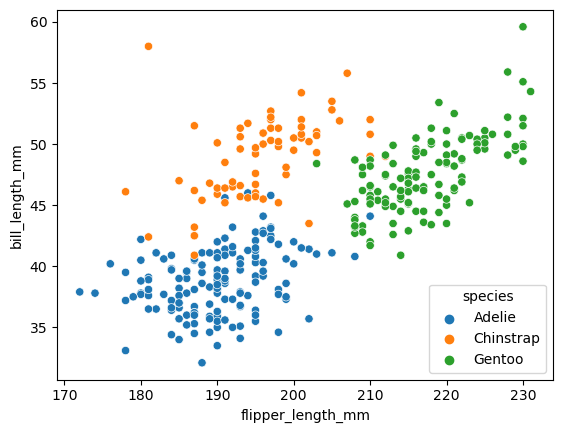

In [26]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')

Seaborn also allows us to see this information for each numeric feature:

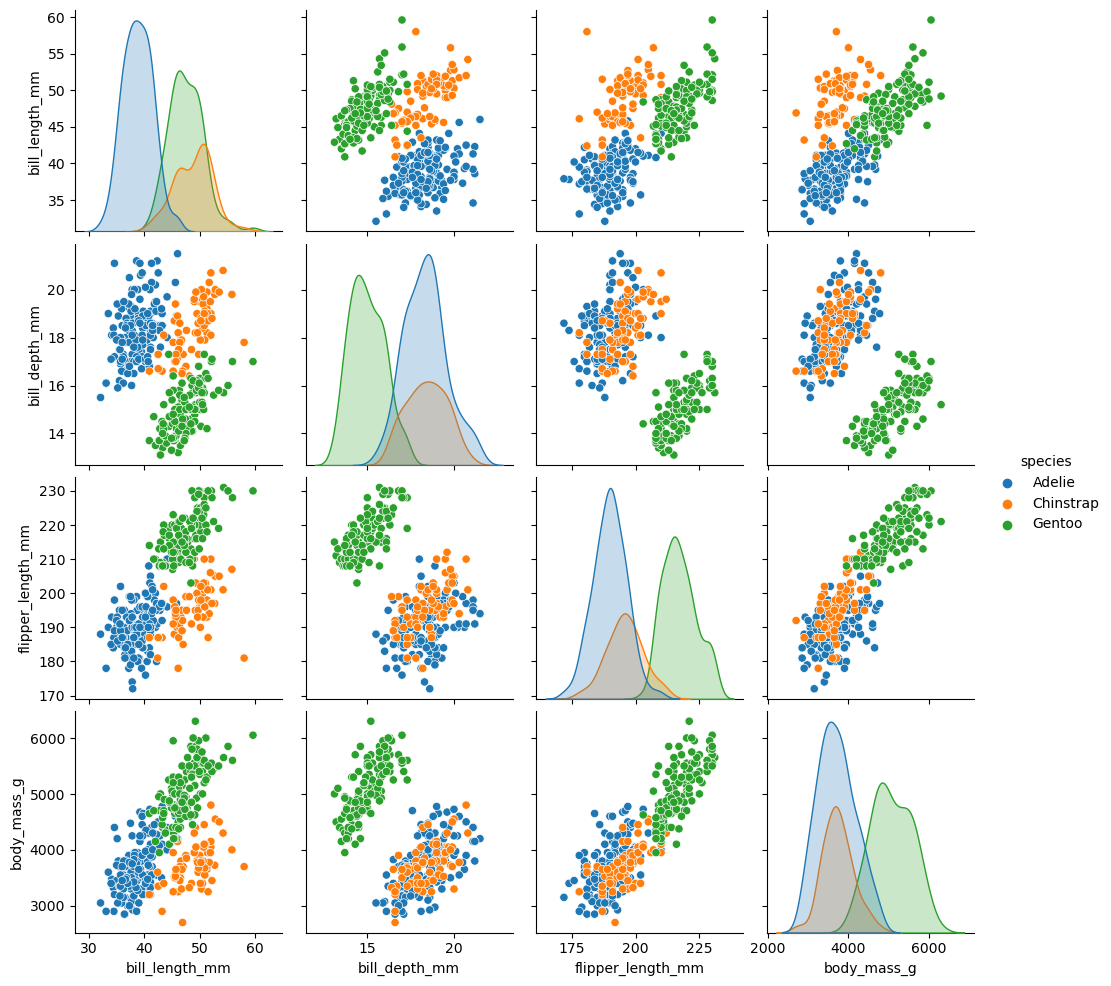

In [27]:
sns.pairplot(data=penguins, hue='species')

<a id = 'preparing'></a>
## 2. Preparing the data for scikit-learn

The first thing we might notice here is that there are some data point entries that have no value - the value simply says `NaN`. This means this information is missing. 

In [28]:
(
    penguins
    .loc[penguins.isnull().any(axis=1)]
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Unfortunately, that also means the information cannot be used as is to create a machine learning model with scikit-learn. We must find a way to deal with the missing values. 

There are multiple strategies for dealing with missing data. For example, you could replace a missing values with the mean of the column. E.g. if for a particular penguin the value for body mass is missing, you could replace the NaN with the mean recorded body mass of all penguins. 

Scikit-learn even provides us with a great interface to apply such transformations. For the moment, however, we simply choose to discard all the incomplete data points with pandas `.dropna()` functionality. 

In [29]:
penguins_cleaned = penguins.dropna()
penguins_cleaned.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Second of all, we notice that we have more information than the penguin measurements _bill length, bill depth, flipper length_ and _body mass_.

Although we could incorporate this extra information (sex of the penguin and the island where the penguin was spotted), this requires some extra preprocessing outside of the scope of this notebook. We choose to focus on our four discussed features first.

We then use our knowledge of Pandas to create our feature matrix $X$ and target vector $y$.

In [30]:
feature_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = penguins_cleaned.loc[:, feature_columns]
y = penguins_cleaned.loc[:, 'species']

print(f'The shape of feature matrix X is: {X.shape}')
print(f'The shape of target vector y is: {y.shape}')

The shape of feature matrix X is: (333, 4)
The shape of target vector y is: (333,)


The feature matrix columns are also known as the predictive variable.

The target,/label vector is known as the dependent variable.

A feature matrix $X$ consists of $n$ samples with $m$ features - in this case $n=333$ and $m=4$.

In [31]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Each row in the feature matrix $X$ corresponds to a value in the target vector $y$.

In [32]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [33]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Our model will then attempt to learn a relationship that can map a row in $X$ to the corresponding value in $y$.

<a id = 'train-test-split'></a>
### Splitting the dataset
An important goal of machine learning is to create a model that does not only do well on the data that it has already seen, but will also perform well under new circumstances on data that is has not seen before. We call this _generalization_. 

Imagine this: Penguin A is a gentoo (bill length of 33, bill depth of of 16, flipper length of 180 and body mass of 3500 grams). 

<img src="images/02_Classification_Penguins/gentoo.jpg" width="300">

Penguin A was presented during the training of our model; that means, penguin A was one of the examples that the algorithm used to create an understanding of what a gentoo looks like and how you can distinguish it from a chinstrap or adélie. 

If we want to know how well our model does, asking the model to classify our penguin A does not give us a lot of information. 

Even if the model is correct, do we know whether it has really truly learned the relationship between the features and the targets (ie. flipper length of >X is always species Y), or has it simply memorized the original data and does it recognise penguin A from the training phase? 

That's why we want to separate our dataset into two parts:
* The _training_ set: this is the data (features and targets) that will guide the learning process. 
* The _test_ set: this is the data (features and targets) that we will use to _evaluate_ how well our model has learned. 

<img src="images/02_Classification_Penguins/train-test.png" width="600">

Scikit-learn's `train_test_split` function allows us to split the data in a train- and testset. By default, the test set size is set to 25% and the data is shuffled. 

In [34]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = ,
                                                   shuffle = 
                                                   stratify = )

print(f'The size of our feature matrix for the train set is: {X_train.shape}')
print(f'The size of our target vector for the train set is: {y_train.shape}')

print(f'\nThe size of our feature matrix for the test set is: {X_test.shape}')
print(f'The size of our target vector for the test set is: {y_test.shape}')

The size of our feature matrix for the train set is: (233, 4)
The size of our target vector for the train set is: (233,)

The size of our feature matrix for the test set is: (100, 4)
The size of our target vector for the test set is: (100,)


Let's see if our data is in fact shuffled: 

In [ ]:
y_test.values

<a id = 'model'></a>
## 3. Model creation and evaluation

Now we're ready to create our machine learning model! 

Scikit-learn has a rich collection of algorithms readily available. Depending on the case you are working on, scikit-learn most likely has a model that will suit your purposes. 

<a id = 'steps'></a>
## Training a Scikit-Learn model

Below are the steps for training a model using the Scikit-Learn API 
1. Choosing a model class and importing that model 
2. Choosing the model hyperparameters by instantiating this class with desired values.
3. Training the model to the preprocessed train data by calling the `fit()` method of the model instance.
4. Evaluating model's performance using available metrics

In [ ]:
# Step 1: import the chosen algorithm 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
help(DecisionTreeClassifier)

<img src="images/02_Classification_Penguins/tree.png" width="600">

In [ ]:
# Step 2: instantiate the model with the chosen hyperparameters
model = DecisionTreeClassifier(max_depth=2)

In [ ]:
# Step 3: train the model with the training data
model.fit(X_train, y_train)

We have now trained a model that can be used to make predictions on new data. Remember our test set? That's new, unseen data to the model that we can now create predictions on. 

In [ ]:
y_pred = model.predict(X_test)
y_pred[0:10]

We can compare these predictions against our original data to see how well our model does. 

In [ ]:
y_test[0:10].values

Fortunately, we don't have to do that comparison ourselves. Scikit-learn has made many implementations of possible metrics readily available, such as accuracy. 

$\text{accuracy} = \frac{correct}{total}$

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

Pretty good! 

Alternatively you can use the `.score()` method. On a Decision Tree this will return the accuracy score:

In [ ]:
model.score(X_test, y_test)

<a id = 'vis'></a>
## Model Visualisation

One of the advantages of decision trees over some of the other available models, is that decision trees are relatively easy to interpret. By visualising the tree-like structure of the decision tree, we can understand why the model classifies samples the way it does.

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(14,10))

plot_tree(model, 
          ax=ax, 
          feature_names = feature_columns, 
          class_names = y.unique());

In [ ]:
model.predict_proba(X_train)

<a id = 'choosing-models'></a>
## <mark>Choosing a different model </mark>

What happens when we're interested in a model other than the decision tree? 

That's actually really easy. You simply replace the chosen model with another and the rest of the pipeline can stay the same.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report 

# Uncomment the model that you want to try
model = DecisionTreeClassifier()
# model = RandomForestClassifier()
# model = KNeighborsClassifier()
# model = SVC()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(f'Model accuracy: {model.score(X_test, y_test)}')
print(report)

# Summary

Scikit-learn is an excellent, resourceful tool for machine learning in Python. We've seen how we can split a dataset with `train_test_split` into a train and test set, create and train a model, use the trained model to create predictions, and how to use the tools from `sklearn.metrics` to evaluate how good the model is. 
![](images/02_Classification_Penguins/palmer-penguins.png) 